# 2487-2122 Machine Learning Assignment 2 

The assignment will contain 1 questions with subquestions for 100% of the total points. 

# STUDENT NAME: ISABEL MORA LABARCA (48516)
 

## Call Me Maybe? (100 points)



![telemarketing](https://neilpatel.com/wp-content/uploads/2019/08/profissional-de-telemarketing-sorridente.jpeg)

Telemarketing is a method of direct marketing in which a salesperson solicits prospective customers to buy products or services over the phone. It has become one of the most widely used marketing campaign methods to engage with customers with product and service opportunity. We have collected real data from a Portuguese retail bank, from May 2008 to June 2013 with thousands of phone contacts. 




The current practice of many data teams is to build such propensity models and predict customer's probability to adopt the product and target them from the highest probability to the lowest probability. Note that telemarketing may incur some costs for contacting the customer, thus the success (i.e., the generated profit) of using machine learning model requries further inspection.  As the data scientist, you are asked to build a propensity model to evaluate the effectiveness of their telemarketing campaigns, i.e. whether the customer subscribed to the term deposit.  

**Telemarketing Dataset (bank.csv)**
All customers are contained in the file bank.csv. Each line of this file after the header row represents one customer of the Portuguese bank, and has the following format:

### bank client data:
- age (numeric)
- job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
- marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
- education (categorical: 'primary', 'secondary', 'tertiary')
- balance: amcount of bank account balance
- default: has credit in default? (categorical: 'no','yes','unknown')
- housing: has housing loan? (categorical: 'no','yes','unknown')
- loan: has personal loan? (categorical: 'no','yes','unknown')

### related with the last contact of the current campaign:
- contact: contact communication type (categorical: 'cellular','telephone', 'unknown')
- day: last contact day of month
- month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
- duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. 

### other attributes:
- campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; -1 means client was not previously contacted)
- previous: number of contacts performed before this campaign and for this client (numeric)
- poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
- y - has the client subscribed a term deposit? (binary: 'yes','no')


Answer the following questions using the provided dataset. You can write down intermediate results towards the final answers. If any model invovles random_state, set it to be 42.

In [1]:
import pandas as pd
import numpy as np

In [2]:
bank = pd.read_csv('bank.csv', sep=';')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [3]:
bank.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [4]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [5]:
bank.y.value_counts()

no     4000
yes     521
Name: y, dtype: int64

The customer adoption behavior is quite unbalanced, with only 12% of customers subscriber the term deposit.

### Question 1 (30 points)

Split the data into 80% training set and 20% test set. **Build a pipeline to preprocess the indicated numerical features and categorical features separately**. For numerical features 'balance', 'campaign', standardize these features. For categorical features 'job', 'marital', 'education', 'default', transform them through one-hot encoding. For the numeric feature 'age', convert it into the quartile categorical variable and transform it through one-hot encoding. 

Train a Logistic regression model with L2 regularization using 5-fold cross validation (default hyperparameter) on the train set and show the accuracy, precision, recall on the train set. Explain whether the model is useful for the bank to identify the customer propensity.

#### Imports
Note: If not installed, it might be required to install sklearn-pandas

In [6]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import OneHotEncoder
from sklearn_pandas import DataFrameMapper
import sklearn.preprocessing, sklearn.decomposition, \
sklearn.linear_model, sklearn.pipeline, sklearn.metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
import numpy as np
from sklearn.metrics import confusion_matrix


In [8]:
pip install sklearn-pandas

Note: you may need to restart the kernel to use updated packages.


In [9]:
np.random.seed(42) # to guarantee consistent results if run multiple times

In [10]:
bank.shape # data size influences how we split the data

(4521, 17)

In [86]:
bank.drop_duplicates() # no duplicates in dataset

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [88]:
# Check for NA values
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [11]:
# Split the data 
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(bank, test_size=0.2, random_state=42)

In [12]:
# We can check proportions to see whether  we should use a stratified split instead

train_set["y"].value_counts(normalize = True)

no     0.88302
yes    0.11698
Name: y, dtype: float64

In [13]:
test_set["y"].value_counts(normalize = True)

no     0.891713
yes    0.108287
Name: y, dtype: float64

In [14]:
bank["y"].value_counts(normalize = True)

no     0.88476
yes    0.11524
Name: y, dtype: float64

There doesnt seem to be a need to use strattified shuffling since the target values are proportional to the original set in both train and test set. However, Géron (2017) recommends this process for cases where our dataset is not large enough, especially when compared with the number of attributes, because we "run the risk of introducing a significant sampling bias". (p. 51). In his example, this process is done for categories that are considered relevant to predict the target variable, however in our case we still don't have that information. It can be helpful to guarantee identical proportions of our subscribers in both train and test set to assure that the test set is also representative of our whole population, but the random split was not that far off.

In [15]:
# We could still use to guarantee *identical* proportions

from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(bank, bank["y"]):
    strat_train_set = bank.loc[train_index]
    strat_test_set = bank.loc[test_index]

In [16]:
strat_train_set["y"].value_counts(normalize = True)

no     0.884679
yes    0.115321
Name: y, dtype: float64

In [17]:
strat_test_set["y"].value_counts(normalize = True)

no     0.885083
yes    0.114917
Name: y, dtype: float64

In [18]:
bank["y"].value_counts(normalize = True)

no     0.88476
yes    0.11524
Name: y, dtype: float64

In [19]:
# Revert to a clean training set (by copying strat_train_set once again),
# and separate the predictors and the labels since we don’t necessarily want to apply
# the same transformations to the predictors and the target values (p.60)

bank_train = strat_train_set.drop("y", axis=1)
bank_train_labels = strat_train_set["y"].copy()

bank_test = strat_test_set.drop("y", axis=1)
bank_test_labels = strat_test_set["y"].copy()

In [20]:
# Change our target variable to binary variable (helpful for further analysis with sklearn)

bank_train_y = bank_train_labels.map({'yes': 1, 'no': 0}).astype(int)
bank_test_y = bank_test_labels.map({'yes': 1, 'no': 0}).astype(int)

#### Build a pipeline to preprocess the indicated numerical features and categorical features separately. For numerical features 'balance', 'campaign', standardize these features. For categorical features 'job', 'marital', 'education', 'default', transform them through one-hot encoding. For the numeric feature 'age', convert it into the quartile categorical variable and transform it through one-hot encoding.

In [21]:
# Select desired columns for processing

num_attribs = ['balance', 'campaign'] # standardize
cat_attribs = ['job', 'marital', 'education', 'default']  # one-hot
age_attrib = ["age"] # quartile categorical variable and transform it through one-hot encoding

In [22]:
# Following code is adapted from book:

# Each subpipeline starts with a selector transformer: it simply transforms the data by
# selecting the desired attributes (numerical or categorical), dropping the rest, and con‐
# verting the resulting DataFrame to a NumPy array (p.67):

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import OneHotEncoder

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

age_pipeline = Pipeline([
 ('selector', DataFrameSelector(age_attrib)),
 ('bins_discretizer', KBinsDiscretizer(n_bins = 4)), #strategy is quantile and encoder is onehot by default
 ])

num_pipeline = Pipeline([
 ('selector', DataFrameSelector(num_attribs)),
 ('std_scaler', StandardScaler()),
 ])

cat_pipeline = Pipeline([
 ('selector', DataFrameSelector(cat_attribs)),
 ('encoder', OneHotEncoder()),
 ])

full_pipeline = FeatureUnion(transformer_list=[
    ("age_pipeline", age_pipeline),
    ("num_pipeline", num_pipeline),
    ("cat_pipeline", cat_pipeline),
    ])

In [23]:
# Run full pipeline only on train data to avoid data snooping bias
bank_train_1 = full_pipeline.fit_transform(bank_train)

# Columns should be 27 total (age:4, job:12, marital:3, education:4, default:2 + 2 numerical)
bank_train_1.shape 

(3616, 27)

When trying to retrieve feature names from pipeline above, the following error arises:
"Estimator selector does not provide get_feature_names_out. Did you mean to call pipeline[:-1].get_feature_names_out()?" Even after trying to select [:-1] from pipeline, the get_feature_names_out method seems to not work, presumably because of the dataframe selector class. Thus, I decided to build another pipeline that would allow me to see the feature names.

In [24]:
# Second method to process features

from sklearn_pandas import DataFrameMapper
import sklearn.preprocessing, sklearn.decomposition, \
sklearn.linear_model, sklearn.pipeline, sklearn.metrics
from sklearn.feature_extraction.text import CountVectorizer

full_pipeline_2 = DataFrameMapper([
    ((age_attrib), sklearn.preprocessing.KBinsDiscretizer(n_bins = 4)),#strategy is quantile and encoder is onehot by default
    ((num_attribs), sklearn.preprocessing.StandardScaler()),
    ((cat_attribs), sklearn.preprocessing.OneHotEncoder())
    ]) 

In [25]:
bank_train_2 = full_pipeline_2.fit_transform(bank_train)

C:\Users\Isabel\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [26]:
bank_train_2.shape

(3616, 27)

In [27]:
# Check that we can get the names
full_pipeline_2.transformed_names_

['age_0',
 'age_1',
 'age_2',
 'age_3',
 'balance_campaign_0',
 'balance_campaign_1',
 'job_marital_education_default_x0_admin.',
 'job_marital_education_default_x0_blue-collar',
 'job_marital_education_default_x0_entrepreneur',
 'job_marital_education_default_x0_housemaid',
 'job_marital_education_default_x0_management',
 'job_marital_education_default_x0_retired',
 'job_marital_education_default_x0_self-employed',
 'job_marital_education_default_x0_services',
 'job_marital_education_default_x0_student',
 'job_marital_education_default_x0_technician',
 'job_marital_education_default_x0_unemployed',
 'job_marital_education_default_x0_unknown',
 'job_marital_education_default_x1_divorced',
 'job_marital_education_default_x1_married',
 'job_marital_education_default_x1_single',
 'job_marital_education_default_x2_primary',
 'job_marital_education_default_x2_secondary',
 'job_marital_education_default_x2_tertiary',
 'job_marital_education_default_x2_unknown',
 'job_marital_education_defaul

In [28]:
# Compare that 2 pipelines are retrieving the exact same array
comparison_1 = bank_train_1.toarray()

np.array_equal(comparison_1, bank_train_2)

True

#### Train a Logistic regression model with L2 regularization using 5-fold cross validation (default hyperparameter) on the train set and show the accuracy, precision, recall on the train set. Explain whether the model is useful for the bank to identify the customer propensity.

In [29]:
# I will first instantiate the model and then fit with cross_validate to be able to return train scores
# Just out of curiosity, I looked at the scores with a balanced dataset since our original data is highly unbalanced
# Depending on what we use, it will affect what score we select to evaluate our model

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=42)

# Balanced
log_reg_balanced = LogisticRegression(random_state=42, class_weight = "balanced")

In [30]:
# Unbalanced data scores

from sklearn.model_selection import cross_validate
import numpy as np

cv_scores = cross_validate(log_reg, bank_train_2, bank_train_y, scoring=["accuracy", "precision", "recall"], cv=5, return_train_score = True)

# Display scores on train and test set at each fold
cv_scores_df = pd.DataFrame(cv_scores) 
print(cv_scores_df)

# Calculate averaged scores for both train and test sets
avg_train_acc = (np.mean(cv_scores["train_accuracy"]))
avg_train_prec = (np.mean(cv_scores["train_precision"]))
avg_train_recall = (np.mean(cv_scores["train_recall"]))

# Test scores (not required by question but might be helpful for analysis)
avg_test_acc = (np.mean(cv_scores_df["test_accuracy"]))
avg_test_prec = (np.mean(cv_scores_df["test_precision"]))
avg_test_recall = (np.mean(cv_scores_df["test_recall"]))
                  
print(f"The cross-validation average Accuracy Score for the train set is: {avg_train_acc}")
print(f"The cross-validation average Precision Score for the train set is: {avg_train_prec}")
print(f"The cross-validation average Recall Score for the train set is: {avg_train_recall}")

C:\Users\Isabel\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Isabel\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Isabel\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Isabel\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precis

   fit_time  score_time  test_accuracy  train_accuracy  test_precision  \
0  0.032999    0.003000       0.883978        0.884855             0.0   
1  0.026001    0.001999       0.885201        0.884549             0.0   
2  0.020001    0.003000       0.885201        0.884549             0.0   
3  0.018012    0.003989       0.885201        0.884549             0.0   
4  0.028000    0.001999       0.883817        0.884895             0.0   

   train_precision  test_recall  train_recall  
0              0.0          0.0           0.0  
1              0.0          0.0           0.0  
2              0.0          0.0           0.0  
3              0.0          0.0           0.0  
4              0.0          0.0           0.0  
The cross-validation average Accuracy Score for the train set is: 0.8846792156772751
The cross-validation average Precision Score for the train set is: 0.0
The cross-validation average Recall Score for the train set is: 0.0


C:\Users\Isabel\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Isabel\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Isabel\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
# Balanced dataset

cv_scores_balanced = cross_validate(log_reg_balanced, bank_train_2, bank_train_y, scoring=["accuracy", "precision", "recall"], cv=5, return_train_score = True)

# Display scores on train and test set at each fold
cv_scores_balanced_df = pd.DataFrame(cv_scores_balanced) 
print(cv_scores_balanced_df)

# Calculate averaged scores for both train and test sets
avg_train_acc_balanced = (np.mean(cv_scores_balanced_df["train_accuracy"]))
avg_train_prec_balanced = (np.mean(cv_scores_balanced_df["train_precision"]))
avg_train_recall_balanced = (np.mean(cv_scores_balanced_df["train_recall"]))

# Test scores (not required by question but might be helpful for analysis)
avg_test_acc_balanced = (np.mean(cv_scores_balanced_df["test_accuracy"]))
avg_test_prec_balanced = (np.mean(cv_scores_balanced_df["test_precision"]))
avg_test_recall_balanced = (np.mean(cv_scores_balanced_df["test_recall"]))
                  
print(f"The cross-validation average Accuracy Score for the train set (with balanced classes) is: {avg_train_acc_balanced}")
print(f"The cross-validation average Precision Score for the train (with balanced classes) set is: {avg_train_prec_balanced}")
print(f"The cross-validation average Recall Score for the train set (with balanced classes) is: {avg_train_recall_balanced}")

   fit_time  score_time  test_accuracy  train_accuracy  test_precision  \
0  0.031984    0.002000       0.600829        0.584025        0.166124   
1  0.026999    0.004001       0.546335        0.595230        0.120743   
2  0.034001    0.003999       0.561549        0.591082        0.138889   
3  0.028000    0.004003       0.575380        0.591082        0.138710   
4  0.018000    0.001999       0.596127        0.594193        0.146259   

   train_precision  test_recall  train_recall  
0         0.153662     0.607143      0.579580  
1         0.160032     0.469880      0.589820  
2         0.160128     0.542169      0.598802  
3         0.160671     0.518072      0.601796  
4         0.158408     0.511905      0.585586  
The cross-validation average Accuracy Score for the train set (with balanced classes) is: 0.5911222969164374
The cross-validation average Precision Score for the train (with balanced classes) set is: 0.1585804556278108
The cross-validation average Recall Score for th

In [32]:
# Summary of results

print('Unbalanced set:')
print("\nAccuracy:")
print(f"\tTrain set: {round(avg_train_acc, 2)}")
print(f"\tTest set: {round(avg_test_acc, 2)}")

print("\nPrecision:")
print(f"\tTrain set: {round(avg_train_prec, 2)}")
print(f"\tTest set: {round(avg_test_prec, 2)}")

print("\nRecall:")
print(f"\tTrain set: {round(avg_train_recall, 2)}")
print(f"\tTest set: {round(avg_test_recall, 2)}")

print('\nBalanced set:')
print("\nAccuracy:")
print(f"\tTrain set: {round(avg_train_acc_balanced, 2)}")
print(f"\tTest set: {round(avg_test_acc_balanced, 2)}")

print("\nPrecision:")
print(f"\tTrain set: {round(avg_train_prec_balanced, 2)}")
print(f"\tTest set: {round(avg_test_prec_balanced, 2)}")

print("\nRecall:")
print(f"\tTrain set: {round(avg_train_recall_balanced, 2)}")
print(f"\tTest set: {round(avg_test_recall_balanced, 2)}")

Unbalanced set:

Accuracy:
	Train set: 0.88
	Test set: 0.88

Precision:
	Train set: 0.0
	Test set: 0.0

Recall:
	Train set: 0.0
	Test set: 0.0

Balanced set:

Accuracy:
	Train set: 0.59
	Test set: 0.58

Precision:
	Train set: 0.16
	Test set: 0.14

Recall:
	Train set: 0.59
	Test set: 0.53


In [33]:
# Helpful for analysis to plot confusion matrix (understand why recall and precision are 0 in the unbalanced dataset)
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(log_reg, bank_train_2, y = bank_train_y, cv = 5)

confusion_matrix(bank_train_y, y_train_pred)

array([[3199,    0],
       [ 417,    0]], dtype=int64)

In [34]:
y_train_pred_balanced = cross_val_predict(log_reg_balanced, bank_train_2, y = bank_train_y, cv = 5)
confusion_matrix(bank_train_y, y_train_pred_balanced)

array([[1862, 1337],
       [ 196,  221]], dtype=int64)

***Findings & Analysis***
- Unbalanced dataset has precision and recall 0 because there were no classes predicted as 1 ("yes", in other words, those that would subscribe to long term deposits). This happened because our model didn't have enough information about this class since it is an unbalanced dataset, and the very few features that are present might not be very helpful in predicting subscribers.
- It is important to emphasize that in data terms, because there were no true positives in our model our precision and recall is automatically 0.
- Unbalanced dataset accuracy seems "good" (0.88), but this does not mean model is perfromring well becasue our dataset is unbalanced. We get high accuracy because even if our model predicts every instance as 0 ("no", so non-subscribers), since only a total of 11% of our data are subscribers, the model would automatically have almost 90 % of accuracy (which is exactly what happened in this case).
- The balanced dataset performed better, yet model overall does not seem great, might be helpful to either add more features, change regularization strength or try another model such as decision tree or random forest. In this case the accuracy drops to 0.59 in the train set, which is more understandable.
- The precision in the balanced dataset is very low (0.16), while the recall is 0.59. This is because the false negatives (considered for recall) were not that many since there is a lot of information about the negative class. Yet, on the other hand, because the weights towards the positive class increased, now the model predicts way more instances as positive even if they are not, just because the model *thinks* that these classes should have equal weights and thus predicts the more dubious negative cases as positive.

***Code explained***
1. When splitting the data, I realized that there was not a big difference between using the stratified sampling method versus the random sampling one from sklearn. However, to guarantee identical proportions of our target variable in both sets, I opted for stratified sampling.
2. I decided to only fit the training data on the preprocessing pipelines rather than the whole data. Later in the assignment I will only "transform" the test data with the already built pipeline. This was done after following the book's suggestions and to avoid "data snooping bias" - that is, to not learn anything from the test set and leave it untouched up until the very end.  Otherwise, even if it's just a quick glance at the data, our brains are prone to overfitting and might "stumble upon some seemingly interesting pattern in the test data that leads you to select a particular kind of machine learning model" (p.49).
3. When using the Dataframe selector, Pipeline and Feature Union, there was an issue when getting the feature names. Because I consider it important for the analysis in a business context, I decided to select an alternative that would work - sklearn-pandas. I used Dataframe Mapper after running pip3 install sklearn-pandas, which in my opinion was easier to handle.
4. For the age, instead of first converting to quantiles categories and then to binary, I found that KBins Binarizer did the same thing in only one step, which I deeemed more efficient.(alternatively we could use pd.qcut(bank_train["age"], q=4)) and get the quartiles. 

### Question 2 (20 points)

Now add more features to the model to see if we can improve the performance (categorical features: 'housing', 'loan' and numerical features: 'day', 'duration'). Use the preprocess pipeline built previously to transform the data. Train a Logistic regression model with L1 regularization using 5-fold cross validation on the train set, by fine-tuning the hyperparameter alpha, i.e. the regularization strength from [0.001, 0.01, 0.1, 1]. Choose the correct score function that reflect the current data team's practice. Report the average score with the best hyperparameter. Does model performance improve, and if so, how?

Expalin whether all features are useful for making prediction and why. List top 5 features that contribute to the prediction the most. If not all features are useful, list those unuseful features.


#### Add more features to the model to see if we can improve the performance (categorical features: 'housing', 'loan' and numerical features: 'day', 'duration'). Use the preprocess pipeline built previously to transform the data.

In [35]:
# Redefine attributes needed for the pipeline by adding the requested features
num_attribs = ['balance', 'campaign', "day", "duration"] # standardize
cat_attribs = ['job', 'marital', 'education', 'default', "housing", "loan"]  #one-hot
age_attrib = ["age"] #quartile categorical variable and transform it through one-hot encoding

full_pipeline_2 = DataFrameMapper([
    ((age_attrib), sklearn.preprocessing.KBinsDiscretizer(n_bins = 4)),#strategy is quantile and encoder is onehot by default
    ((num_attribs), sklearn.preprocessing.StandardScaler()),
    ((cat_attribs), sklearn.preprocessing.OneHotEncoder())
    ]) 

In [36]:
# Run full pipeline with new features
bank_train_q2 = full_pipeline_2.fit_transform(bank_train)
bank_train_q2.shape # should have 33 columns

C:\Users\Isabel\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


(3616, 33)

#### Train a Logistic regression model with L1 regularization using 5-fold cross validation on the train set by fine-tuning the hyperparameter alpha, i.e. the regularization strength from [0.001, 0.01, 0.1, 1]. Choose the correct score function that reflect the current data team's practice.

In [37]:
from sklearn.model_selection import GridSearchCV

# Instantiate the model, then look for best parameters with cross-validation
log_reg_q2 = LogisticRegression(solver = "liblinear", random_state=42, penalty = "l1") #dataset not big, liblinear might be better option than saga
parameters = {'C':[0.001, 0.01, 0.1, 1]}
clf_f1 = GridSearchCV(log_reg_q2, param_grid = parameters, scoring = "f1", return_train_score = True, cv = 5)
clf_f1.fit(bank_train_q2, bank_train_y)

clf_auc = GridSearchCV(log_reg_q2, param_grid = parameters, scoring = "roc_auc", return_train_score = True, cv = 5)
clf_auc.fit(bank_train_q2, bank_train_y)

# Not required by assignment, but I could double check how model does with balanced dataset
parameters_weights = [{'C':[0.001, 0.01, 0.1, 1]}, {"class_weight" : [None, "balanced", {0:8, 1:2}, {0:7, 1:3}]}]
clf_weights = GridSearchCV(log_reg_q2, parameters_weights, scoring = "accuracy", return_train_score = True, cv = 5)
clf_weights.fit(bank_train_q2, bank_train_y)

GridSearchCV(cv=5,
             estimator=LogisticRegression(penalty='l1', random_state=42,
                                          solver='liblinear'),
             param_grid=[{'C': [0.001, 0.01, 0.1, 1]},
                         {'class_weight': [None, 'balanced', {0: 8, 1: 2},
                                           {0: 7, 1: 3}]}],
             return_train_score=True, scoring='accuracy')

#### Choose the correct score function that reflect the current data team's practice.
**From prompt:**
*The current practice of many data teams is to build such propensity models and predict customer's probability to adopt the product and target them from the highest probability to the lowest probability. Note that telemarketing may incur some costs for contacting the customer, thus the success (i.e., the generated profit) of using machine learning model requries further inspection. As the data scientist, you are asked to build a propensity model to evaluate the effectiveness of their telemarketing campaigns, i.e. whether the customer subscribed to the term deposit*

***Analysis***
- One of the most common scores is accuracy. However, because we are dealing with a naturally unbalanced dataset, as explained in question 1, using accuracy will not give the most optimal results since it is prone to predict all customers as non-subscribers (thus we wouldn't target anyone, probably not incur in costs, but also not generate revenues).
- Thus, we can look at precision and/or recall. In this case, there is a cost for contacting the customer, which until now is not known. If we have a cost for contacting the customer it means that there is a cost associated with the false positives (those that are predicted to subscribe and we would contact, but end up not subscribing). This way, precision would be a good score to look at. 
- Yet, we also want to avoid the false negatives in targeted campaigns, that is, those that would subscribe if contacted, but we don't contact them. This is because the potential revenue that we could receive from the customer is way higher than the cost of contacting them. For this metric, recall is a good option.
- Overall, if we compare the cost of targeting a customer that results in departure vs. with the cost of losing a customer because there was no incentive offered, the costs are unlikley to be equal. Ideally, the estimates of cost and benefits should be done to properly estimate each classifier. This is why the expetced value computation framework is helpful in this type of analyses: "it decomposes data-analytic thinking into (i) the structure of the problem, (ii) the elements of the analysis that can be extracted from the data, and (iii) the elements of the analysis that need to be acquired from other sources (e.g., business knowledge of subject matter experts)." (Data Science for Business, YEAR).
- Moreover, in marketing campaigns might have different budgets and costs, and labor force may be limited. If there is a limited budget or workforce, the goal is to give the top ranked cases of potential cusotmer subsription (those for which our model has a high probability).
- Because both precision and recall seem to have some importance, one good metric to use to find the best hyperparameter would be the f1 score. This score would give us the harmonic mean of precision and recall of the positive class.
- Another option which will also be helpful for following question is the AUC score. According to Provost & Fawcett (2013), an "approach is to use a method that can accomodate uncertainty by showing the entire space of performance possibilities. One such method is the Receiver Operating Characteristics (ROC) graph ...a two-dimensional plot of a classifier with false positive rate on the x axis against true positive rate on the y axis. As such, a ROC graph depicts relative trade-offs that a classifier makes between benefits (true positives) and costs (false positives)."
- Using AUC would then represent that we correclty classify positives more often than we incorrectly classify them.
- Another advantage of using AUC is that it allows us to compare multiple models by a single number and its independence of the decision threshold of the classifier.

#### Report the average score with the best hyperparameter. Does model performance improve, and if so, how?

In [38]:
# Best hyperparameter when considering F1 score

clf_f1.best_params_

{'C': 1}

In [39]:
clf_f1.best_score_

0.2910710633404073

In [40]:
clf_f1.cv_results_

{'mean_fit_time': array([0.00380068, 0.00760031, 0.01900001, 0.04499912]),
 'std_fit_time': array([0.00074949, 0.00101946, 0.00357788, 0.00675331]),
 'mean_score_time': array([0.00139894, 0.00120001, 0.00120082, 0.00180049]),
 'std_score_time': array([0.00079899, 0.00039992, 0.00039928, 0.00074844]),
 'param_C': masked_array(data=[0.001, 0.01, 0.1, 1],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.001}, {'C': 0.01}, {'C': 0.1}, {'C': 1}],
 'split0_test_score': array([0.        , 0.12631579, 0.27522936, 0.28828829]),
 'split1_test_score': array([0.        , 0.16326531, 0.25925926, 0.27027027]),
 'split2_test_score': array([0.        , 0.20408163, 0.2962963 , 0.33027523]),
 'split3_test_score': array([0.        , 0.12765957, 0.26666667, 0.35897436]),
 'split4_test_score': array([0.        , 0.12765957, 0.21568627, 0.20754717]),
 'mean_test_score': array([0.        , 0.14979638, 0.26262757, 0.29107106]),
 'std_test

In [41]:
# Best hyperparameter when considering ROC-AUC score

clf_auc.best_params_

{'C': 0.1}

In [42]:
clf_auc.best_score_

0.8444436706837412

In [43]:
clf_auc.cv_results_

{'mean_fit_time': array([0.00319963, 0.00779824, 0.02139955, 0.04521365]),
 'std_fit_time': array([0.00039957, 0.0011666 , 0.00546377, 0.00365508]),
 'mean_score_time': array([0.00100031, 0.00140076, 0.00140052, 0.00140028]),
 'std_score_time': array([4.15696997e-07, 4.89844427e-04, 4.90330502e-04, 4.89453853e-04]),
 'param_C': masked_array(data=[0.001, 0.01, 0.1, 1],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.001}, {'C': 0.01}, {'C': 0.1}, {'C': 1}],
 'split0_test_score': array([0.5       , 0.82240513, 0.84317336, 0.8436756 ]),
 'split1_test_score': array([0.5       , 0.83774473, 0.85619352, 0.83062877]),
 'split2_test_score': array([0.5       , 0.81326242, 0.83271837, 0.84540663]),
 'split3_test_score': array([0.5       , 0.84349586, 0.85176958, 0.83072289]),
 'split4_test_score': array([0.5       , 0.82538751, 0.83836351, 0.84842388]),
 'mean_test_score': array([0.5       , 0.82845913, 0.84444367, 0.839771

In [44]:
# Average scores with the best hyperparameter for f1 score

from sklearn.model_selection import cross_validate
import numpy as np
cv_scores = cross_validate(clf_f1.best_estimator_, bank_train_q2, bank_train_y, scoring=["accuracy", "precision", "recall", "f1", "roc_auc"], cv=5, return_train_score = True)

# Display scores on train and test set at each fold
cv_scores_df = pd.DataFrame(cv_scores) 
print(cv_scores_df)

# Calculate averaged scores for both train and test sets
avg_train_acc = (np.mean(cv_scores["train_accuracy"]))
avg_train_prec = (np.mean(cv_scores["train_precision"]))
avg_train_recall = (np.mean(cv_scores["train_recall"]))
avg_train_f1 = (np.mean(cv_scores["train_f1"]))
avg_train_auc = (np.mean(cv_scores["train_roc_auc"]))

print(f"The cross-validation average F1 Score for the train set is: {avg_train_f1}")
print(f"The cross-validation average ROC-AUC Score for the train set is: {avg_train_auc}")    
print(f"The cross-validation average Accuracy Score for the train set is: {avg_train_acc}")
print(f"The cross-validation average Precision Score for the train set is: {avg_train_prec}")
print(f"The cross-validation average Recall Score for the train set is: {avg_train_recall}")

   fit_time  score_time  test_accuracy  train_accuracy  test_precision  \
0  0.054000    0.018999       0.890884        0.893154        0.592593   
1  0.046997    0.006999       0.887967        0.894227        0.535714   
2  0.041002    0.005998       0.899032        0.892845        0.692308   
3  0.049001    0.004001       0.896266        0.889734        0.617647   
4  0.038000    0.006997       0.883817        0.895264        0.500000   

   train_precision  test_recall  train_recall   test_f1  train_f1  \
0         0.605263     0.190476      0.207207  0.288288  0.308725   
1         0.629630     0.180723      0.203593  0.270270  0.307692   
2         0.613208     0.216867      0.194611  0.330275  0.295455   
3         0.572816     0.253012      0.176647  0.358974  0.270023   
4         0.638889     0.130952      0.207207  0.207547  0.312925   

   test_roc_auc  train_roc_auc  
0      0.843676       0.859265  
1      0.830629       0.860184  
2      0.845407       0.857221  
3      0

In [45]:
# Average scores with the best hyperparameter for AUC score

from sklearn.model_selection import cross_validate
import numpy as np
cv_scores = cross_validate(clf_auc.best_estimator_, bank_train_q2, bank_train_y, scoring=["accuracy", "precision", "recall", "f1", "roc_auc"], cv=5, return_train_score = True)

# Display scores on train and test set at each fold
cv_scores_df = pd.DataFrame(cv_scores) 
print(cv_scores_df)

# Calculate averaged scores for both train and test sets
avg_train_acc = (np.mean(cv_scores["train_accuracy"]))
avg_train_prec = (np.mean(cv_scores["train_precision"]))
avg_train_recall = (np.mean(cv_scores["train_recall"]))
avg_train_f1 = (np.mean(cv_scores["train_f1"]))
avg_train_auc = (np.mean(cv_scores["train_roc_auc"]))

print(f"The cross-validation average F1 Score for the train set is: {avg_train_f1}")
print(f"The cross-validation average ROC-AUC Score for the train set is: {avg_train_auc}")    
print(f"The cross-validation average Accuracy Score for the train set is: {avg_train_acc}")
print(f"The cross-validation average Precision Score for the train set is: {avg_train_prec}")
print(f"The cross-validation average Recall Score for the train set is: {avg_train_recall}")

   fit_time  score_time  test_accuracy  train_accuracy  test_precision  \
0  0.025998    0.004001       0.890884        0.893845        0.600000   
1  0.012981    0.005002       0.889350        0.893190        0.560000   
2  0.029999    0.003999       0.894882        0.893536        0.640000   
3  0.025999    0.006000       0.893499        0.891116        0.636364   
4  0.019000    0.003999       0.889350        0.892499        0.611111   

   train_precision  test_recall  train_recall   test_f1  train_f1  \
0         0.632653     0.178571      0.186186  0.275229  0.287703   
1         0.628866     0.168675      0.182635  0.259259  0.283063   
2         0.635417     0.192771      0.182635  0.296296  0.283721   
3         0.602151     0.168675      0.167665  0.266667  0.262295   
4         0.610000     0.130952      0.183183  0.215686  0.281755   

   test_roc_auc  train_roc_auc  
0      0.843173       0.851091  
1      0.856194       0.850709  
2      0.832718       0.851175  
3      0

In [46]:
# Confusion matrix for analysis

print("Confusion matrix for best model using F1 score")
y_train_pred_q2_f1 = cross_val_predict(clf_f1.best_estimator_, bank_train_q2, y = bank_train_y, cv = 5)
confusion_matrix(bank_train_y, y_train_pred_q2_f1)

Confusion matrix for best model using F1 score


array([[3143,   56],
       [ 336,   81]], dtype=int64)

In [47]:
print("Confusion matrix for best model using AUC score")
y_train_pred_q2_auc = cross_val_predict(clf_auc.best_estimator_, bank_train_q2, y = bank_train_y, cv = 5)
confusion_matrix(bank_train_y, y_train_pred_q2_auc)

Confusion matrix for best model using AUC score


array([[3154,   45],
       [ 347,   70]], dtype=int64)

#### Does model performance improve, and if so, how?

***Analysis***
- Overall, the model improves significantly with the l1 regularization and the best hyperparameter according to our desired score.
- If we compare with the results of our first model (unbalanced), we see that all metrics are better (Precision and Recall were 0), now precision has an average score on training set of 0.62, and recall of 0.18. Accuracy remained high with an average of 0.89 on training set.
- Moreover, if we take a glance over the test scores at each fold, we see that they are very similar to the train ones, which is a good indicator that our model is not overfitting.
- The main reason of improvement comes because of 3 main changes: the hyperparamter tuning, the regularization used and the addition of features. L1 regularization (lasso regularization) has a stronger effect because it drives to 0 the weights of those features that are deemed non-relevant for our prediction. This helps the model in avoid "noise" in the data and only consider the features that are relevant for prediction. 
- Furthermore, our previous model might have had very few features, or the features that it contained might not have been that important to understand positive classes. Thus, by adding features such as housing, loan, day and duration, we increase a lot the performance of our model. We might investigate this further in the next section of this question.
- When looking at both confusion matrices below, we see that now not only we predict some customers that will subscribe, but that we do so more often correctly than not, which is what we were aiming for.

#### Expalin whether all features are useful for making prediction and why. 

***Answer***:
Because we are using L1 regularization, we know that this type of regularization automatically performs feature selection by giving a weight of 0 to those features that does not consider important. Thus, we can look at which features have a higher coefficient, and those that have a coefficient of 0 to determine which are helping more our model.

Another possibility to retrieve feature importance would be to train a tree classifier (such as Random Forest), which provides us with the feature importance since those features closer to the "main" node will be generally more important, while those closer to the bottom are considered of less importance.

In [48]:
# Check coefficients
clf_f1.best_estimator_.coef_

array([[ 0.        , -0.05121723, -0.19224028,  0.        ,  0.06630694,
        -0.28932095, -0.04945673,  1.04199715,  0.4095094 , -0.34623246,
        -0.1115824 , -0.18712008,  0.22952975,  0.71163608, -0.20328263,
         0.        ,  0.90341106,  0.        , -0.37779082,  0.62802591,
         0.        , -0.35969777, -0.17309097, -0.11747827,  0.        ,
         0.17377413, -0.37328017, -0.38281694,  0.        ,  0.        ,
        -0.76053207,  0.        , -0.84879931]])

In [49]:
# Some coefficients are 0, but we don't have the features name yet

# Get feature names
coef_best_parameter_df = pd.DataFrame(clf_f1.best_estimator_.coef_)
coef_best_parameter_df.columns = full_pipeline_2.transformed_names_
full_pipeline_2.transformed_names_

['age_0',
 'age_1',
 'age_2',
 'age_3',
 'balance_campaign_day_duration_0',
 'balance_campaign_day_duration_1',
 'balance_campaign_day_duration_2',
 'balance_campaign_day_duration_3',
 'job_marital_education_default_housing_loan_x0_admin.',
 'job_marital_education_default_housing_loan_x0_blue-collar',
 'job_marital_education_default_housing_loan_x0_entrepreneur',
 'job_marital_education_default_housing_loan_x0_housemaid',
 'job_marital_education_default_housing_loan_x0_management',
 'job_marital_education_default_housing_loan_x0_retired',
 'job_marital_education_default_housing_loan_x0_self-employed',
 'job_marital_education_default_housing_loan_x0_services',
 'job_marital_education_default_housing_loan_x0_student',
 'job_marital_education_default_housing_loan_x0_technician',
 'job_marital_education_default_housing_loan_x0_unemployed',
 'job_marital_education_default_housing_loan_x0_unknown',
 'job_marital_education_default_housing_loan_x1_divorced',
 'job_marital_education_default_hou

In [50]:
# Change names for better understanding

q2_feature_labels = ["Age_Q1", "Age_Q2", "Age_Q3", "Age_Q4", "Balance_Scaled", "Campaign_Scaled", "Day_Scaled", "Duration_Scaled",                                   
 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services',
 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married', 'marital_single', 'education_primary',
 'education_secondary', 'education_tertiary', 'education_unknown', 'default_no', 'default_yes', 'housing_no', 'housing_yes', 'loan_no',
 'loan_yes']

#### List top 5 features that contribute to the prediction the most. If not all features are useful, list those unuseful features.

In [51]:
coef_best_parameter_df.columns = q2_feature_labels
print("Top 5 features that contribute to prediction the most: ")

abs(coef_best_parameter_df).T.sort_values (by = 0, ascending = False)[:5] 

# abs(coef_best_parameter_df).T.sort_values (by = 0, ascending = False)  Uncomment to get all features coefficients

Top 5 features that contribute to prediction the most: 


,0
Duration_Scaled,1.041997
job_student,0.903411
loan_yes,0.848799
housing_yes,0.760532
job_retired,0.711636


In [52]:
print("Top 5 negative features: ")
coef_best_parameter_df.T.sort_values (by = 0, ascending = False)[-5:] 

Top 5 negative features: 


,0
education_unknown,-0.373280
job_unemployed,-0.377791
default_no,-0.382817
housing_yes,-0.760532
loan_yes,-0.848799


In [53]:
print("Top 5 positive features: ")
coef_best_parameter_df.T.sort_values (by = 0, ascending = False)[:5] 

Top 5 positive features: 


,0
Duration_Scaled,1.041997
job_student,0.903411
job_retired,0.711636
job_unknown,0.628026
job_admin.,0.409509


In [54]:
print("Unuseful features (coefficient = 0 because of Lasso Regularization automatic feature selection):")
coef_best_parameter_df.loc[:, (coef_best_parameter_df == 0).all()].T

Unuseful features (coefficient = 0 because of Lasso Regularization automatic feature selection):


,0
Age_Q1,0.0
Age_Q4,0.0
job_services,0.0
job_technician,0.0
marital_divorced,0.0
education_secondary,0.0
default_yes,0.0
housing_no,0.0
loan_no,0.0


In [55]:
# Compare with correlation matrix (just for analysis)

# Get all preprocessed data with names in dataframe
#columns_features = full_pipeline_2.transformed_names_
features_df = pd.DataFrame(bank_train_q2)
labels_df = pd.DataFrame(bank_train_y)
labels_df.reset_index(inplace = True)
labels_df = labels_df.drop(["index"], axis=1)
new = pd.concat([features_df, labels_df], axis = 1)
columns_features_new = q2_feature_labels + ["y"]
new.columns = columns_features_new

# Calculate correlation matrix with preprocessed data 
corr_matrix = new.corr()
corr_matrix["y"].sort_values(ascending=False)

y                      1.000000
Duration_Scaled        0.407961
housing_no             0.110098
job_retired            0.080032
loan_no                0.072961
job_student            0.061935
education_tertiary     0.047414
marital_single         0.042986
marital_divorced       0.038550
Age_Q4                 0.037510
job_management         0.035340
job_unknown            0.027371
Balance_Scaled         0.025249
Age_Q1                 0.020128
job_admin.             0.011119
job_housemaid          0.000468
default_yes            0.000271
default_no            -0.000271
education_unknown     -0.005636
job_self-employed     -0.008079
job_entrepreneur      -0.011730
job_technician        -0.014174
job_unemployed        -0.014447
job_services          -0.015276
education_secondary   -0.018248
Age_Q2                -0.021824
Day_Scaled            -0.025752
education_primary     -0.031862
Age_Q3                -0.036804
Campaign_Scaled       -0.060484
marital_married       -0.064686
job_blue

In [56]:
# Age quartiles for discussion
pd.qcut(bank_train["age"], q=4)

2236    (18.999, 33.0]
858       (33.0, 39.0]
3531      (39.0, 48.0]
2737      (33.0, 39.0]
1257      (48.0, 87.0]
             ...      
4327      (48.0, 87.0]
1205      (33.0, 39.0]
4095      (33.0, 39.0]
4335      (33.0, 39.0]
1165      (33.0, 39.0]
Name: age, Length: 3616, dtype: category
Categories (4, interval[float64]): [(18.999, 33.0] < (33.0, 39.0] < (39.0, 48.0] < (48.0, 87.0]]

***Analysis***
- "An important characteristic of Lasso Regression is that it tends to completely eliminate the weights of the least important features (i.e., set them to zero)." ... " In other words, Lasso Regression automatically performs feature selection and outputs a sparse model (i.e., with few nonzero feature weights)" (p.130). This was considered the basis for our analysis regarding feature importance, but other methods such as training a Random Forest might be helpful.
- Our best hyperparameter for C in the f1-focused regression was 1. "The hyperparameter controlling the regularization strength of a Scikit-Learn LogisticRegression model is not alpha (as in other linear models), but its inverse: C. The higher the value of C, the less the model is regularized.". Thus, we probably see a C = 1 as best parameter because there was already regularization made by the l1 penalty.
- The most important part to highlight here is that by adding features such as duration, housing and loan, we were able to increase the model's prediction score becasue these features contribute a lot to the model. 
- Duration of last contact is very relevant for the target values. This is because if duration = 0, then y = no. However, a drawback of this situation is that duration cannot be used for prediction because it is a feature that it is not known beforehand.
- Housing and personal loans were relevant features. From a business perspective, this might indicate that those with more debt are less likely to subscribe for a long term deposit (in the correlation matrix these two features were last, as well as in the top features top negative coefficients, indicating a negative relationship) 
- When calculating the confusion matrices, I decided to use cross_val_predict to guarantee a "clean" prediction - a prediction that is made by a model that never saw the data during training - but still without touching the test data - because it returns the preidctions made on each test fold (of the training data).

### Question 3 (15 points)

Now use the best model found in the cross-validation to predict the test set, show the obtained confusion matrix. Assume that targeting each customer would cost 10 euros and if the customer subscribe, the company would earn 50 euros. If we perform targeted telemarketing to all customers that are predicted to subscribe in the test set, what's the resulting profit?

#### Now use the best model found in the cross-validation to predict the test set, show the obtained confusion matrix

In [57]:
# Run only transform pipeline on test set
bank_prepared_test = full_pipeline_2.transform(bank_test)
bank_prepared_test.shape

C:\Users\Isabel\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


(905, 33)

In [58]:
# Make predictions on test set
y_test_pred_f1 = clf_f1.best_estimator_.predict(bank_prepared_test)

In [59]:
y_test_pred_auc = clf_auc.best_estimator_.predict(bank_prepared_test)

In [60]:
# Define function to plot confusion matrix -- helpful for visualization
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

def plot_confusion_matrix(matrix):
    class_names=[0,1] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # create heatmap
    sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

# TN, FP 
# FN, TP

Confusion matrix considering f1 score


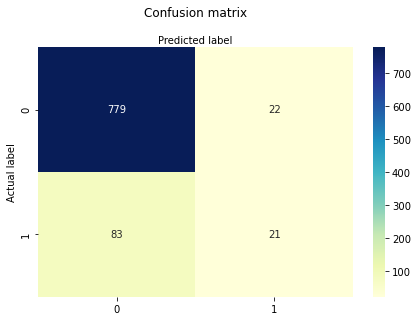

In [91]:
print("Confusion matrix considering f1 score")
cnf_matrix = confusion_matrix(bank_test_y, y_test_pred_f1)
plot_confusion_matrix(cnf_matrix)

Confusion matrix considering AUC score


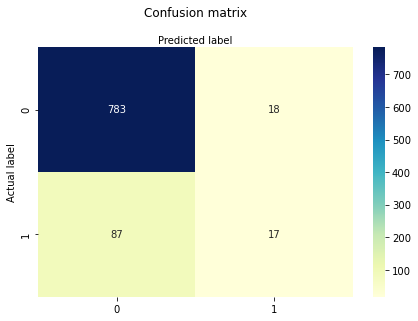

In [89]:
print("Confusion matrix considering AUC score")
cnf_matrix_auc = confusion_matrix(bank_test_y, y_test_pred_auc)
plot_confusion_matrix(cnf_matrix_auc)

#### Assume that targeting each customer would cost 10 euros and if the customer subscribe, the company would earn 50 euros. If we perform targeted telemarketing to all customers that are predicted to subscribe in the test set, what's the resulting profit?

In [92]:
true_pos = cnf_matrix[1, 1]
true_neg = cnf_matrix[0,0]
false_pos = cnf_matrix[0, 1]
false_neg = cnf_matrix[1, 0]

TARGET_COST = 10
SUBSC_REV = 50
profit_formula = SUBSC_REV * true_pos - ((true_pos + false_pos)*TARGET_COST) 

print(f"""If we perform targeted telemarketing to all cusomter that are predicted to subscribe in the test set, the resulting 
profit would be {profit_formula} euros.""")

If we perform targeted telemarketing to all cusomter that are predicted to subscribe in the test set, the resulting 
profit would be 620 euros.


### Question 4 (20 points)

Now adjust the decision threshold in order to optimize the obtained profit. What would be the resulting threshold and profit? Is the propensity model built based on the targeing predicted probability useful in terms of profit maximizing? Explain your findings.

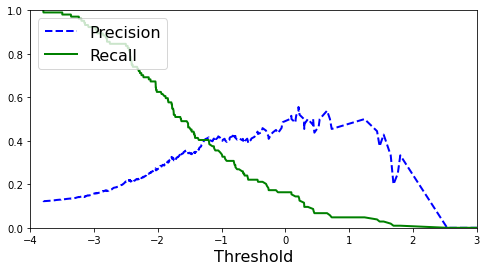

In [64]:
# Initial approach: look at precision/recall curve 

# One approach is to extract the decision function from our best estimator to then plot the precision-recall curve
y_scores = cross_val_predict(clf_f1.best_estimator_, bank_prepared_test, bank_test_y, cv=5,
                             method="decision_function")

from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(bank_test_y, y_scores)
import matplotlib.pyplot as plt
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-4, 3])

plt.show()

From the plot above, we see how different thresholds affect our precision and recall. This is a "summary" of what would be to calculate a confusion matrix at each threshold. However, as stated earlier, for our purposes both precision and recall have some importance. However, if I were to pick from this plot a threshold, I would prioritize a little bit precision over recall by selecting a threshold of around -1. We can see what that takes us first:

In [65]:
from sklearn import metrics
from sklearn.metrics import precision_score

y_test_pred_precision = (y_scores > -1)
precision_score(bank_test_y, y_test_pred_precision)

0.4069767441860465

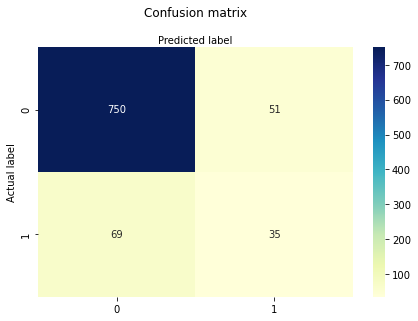

In [66]:
opt_cnf_matrix = confusion_matrix(bank_test_y, y_test_pred_precision)
plot_confusion_matrix(opt_cnf_matrix)

In [67]:
true_pos = opt_cnf_matrix[1, 1]
true_neg = opt_cnf_matrix[0,0]
false_pos = opt_cnf_matrix[0, 1]
false_neg = opt_cnf_matrix[1, 0]
TARGET_COST = 10
SUBSC_REV = 50
profit_formula = SUBSC_REV * true_pos - ((true_pos + false_pos)*TARGET_COST) 

print(f"""If we perform targeted telemarketing to all cusomter that are predicted to subscribe in the test set, the resulting 
profit would be {profit_formula} euros.""")

If we perform targeted telemarketing to all cusomter that are predicted to subscribe in the test set, the resulting 
profit would be 890 euros.


However, it seems that there is still uncertainty in this method on whether this is actually the best threshold for our estimator. Because of this, a better approach would be to define a function that calculates the profit for each threshold of our estimator, and then selects the best threshold for our decision function. See function below:

In [68]:
# Function to calculate expected profit
SUBSC_REV = 50
TARGET_COST = 10
 
prob_pred=clf_f1.best_estimator_.predict_proba(bank_prepared_test)[:,1]
#fpr, tpr, thresholds = metrics.roc_curve(bank_test_y, prob_pred)  # thresholds based on fpr and tpr 
precisions, recalls, thresholds = precision_recall_curve(bank_test_y, prob_pred)

def expected_profit_func():
    all_profits = []
    for thresh in thresholds: # for-loop for each threshold
        
        y_test_pred_threshold = (prob_pred > thresh)   # all positives predictions at that threshold
        opt_cnf_matrix = confusion_matrix(bank_test_y, y_test_pred_threshold)   # confusion matrix at this threshold
        true_pos = opt_cnf_matrix[1, 1]
        true_neg = opt_cnf_matrix[0,0]
        false_pos = opt_cnf_matrix[0, 1]
        false_neg = opt_cnf_matrix[1, 0]

        profit = SUBSC_REV * true_pos - ((true_pos + false_pos)*TARGET_COST) 
        all_profits.append(profit)
    return all_profits

In [69]:
profits_each_threshold = expected_profit_func()

# Now that we have all profits at each threshold, let's look at the max
max(profits_each_threshold)

1360

1360 certainly seems better than 890 euros in terms of profit. What's the threshold? 

In [70]:
max_thresh_index = np.argmax(profits_each_threshold)
threshold_optimizer = thresholds[max_thresh_index] 

print(f"The threshold to optimize our profits is of {threshold_optimizer} for our best estimator classifier")

The threshold to optimize our profits is of 0.1556397785288501 for our best estimator classifier


C:\Users\Isabel\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


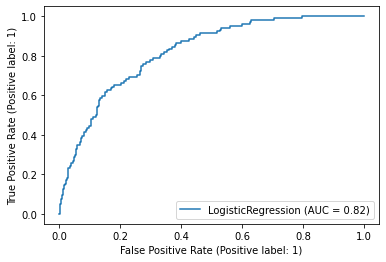

In [71]:
# Plot ROC curve
metrics.plot_roc_curve(clf_f1.best_estimator_, bank_prepared_test, bank_test_y) 

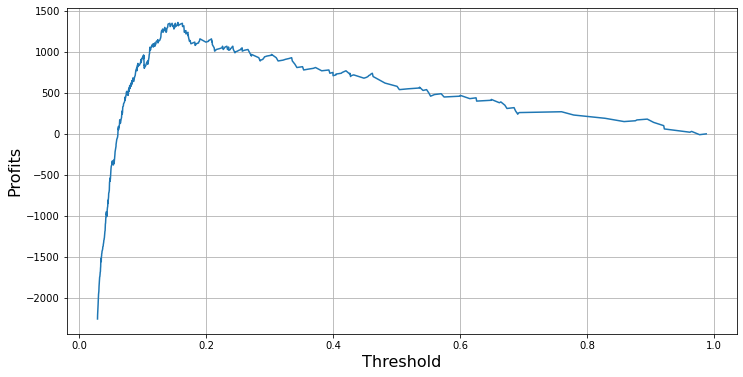

In [72]:
# Plot our profits against threshold (this is very helpful especially in business contexts)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.xlabel("Threshold", fontsize=16)
plt.ylabel("Profits", fontsize=16)
plt.plot(thresholds, profits_each_threshold)
plt.grid()

plt.show()

What would be the resulting threshold and profit? Is the propensity model built based on the targeing predicted probability useful in terms of profit maximizing? Explain your findings.

***Analysis***
- The resulting threshold after maximizing the profit was of around 0.16, with a profit of 1360. 
- I extracted the thresholds from the precision_recall_curve, and then created a function that generates a confusion matrix at each threshold. In this case, we predict the probability of each customer subscribing, and compare it with each threshold obtained. 
- Thus, we can conclude that targeting the predicting probability is definitely useful when trying to maximize profit (this effect would be seen at a way higher scale if having more customers. As we saw, we moved from an unoptimized profit of 620 euros to 1360 euros, which is more than double than the original profit. This is a great indicator that by having a model with accurate probabilities of each instance is helpful for profit maximization.
- In this case, we are alrady seeing our model performance on the test set. However, if we wanted to calculated expected profit, we would need to adapt the formula to something like:

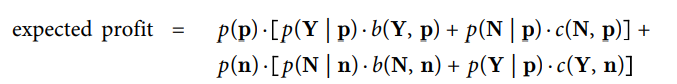


- where p(p) is the probability of subscribing (p.202, 2013). This is because we wouldn't be able to "test" if our predictions are right, so the profit would be only an estimate. To accurately estimate the profit, we need to consider the class priors - the "likelihood of seeing positive and negative instances" (p.201, 2013). 
- In our case, because we wanted to know the profit based on our model's predictions on the test set, we already had with what to compare and were able to properly identify the profit if we were to use our best estimator model.

### Question 5 (15 points)

Now train a random forest model, with 10 decision trees and max_depth=2, what is the profit that can be achieved given the threshold that you identified earlier? Do you need to increase or decrese the threshold to maximize the profit using random forest model? Explain your result.

In [73]:
from sklearn.ensemble import RandomForestClassifier

forest_clas = RandomForestClassifier(n_estimators=10, random_state=42, max_depth=2)
forest_clas.fit(bank_train_q2, bank_train_y)

RandomForestClassifier(max_depth=2, n_estimators=10, random_state=42)

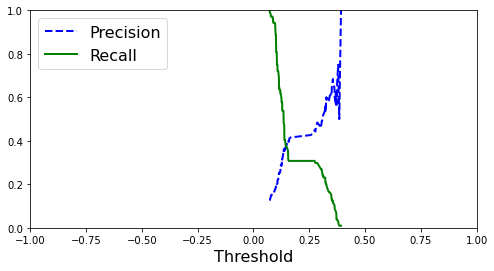

In [74]:
# Initial approach: look at precision/recall curve 

# One approach is to extract the decision function from our best estimator to then plot the precision-recall curve

prob_pred=forest_clas.predict_proba(bank_prepared_test)[:,1]
#fpr, tpr, thresholds = metrics.roc_curve(bank_test_y, prob_pred)  # thresholds based on fpr and tpr 
precisions, recalls, thresholds = precision_recall_curve(bank_test_y, prob_pred)

import matplotlib.pyplot as plt
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-1, 1])

plt.show()

We might need to decrease the threshold to obtain bigger profits, but we can double check with confusion matrix

In [75]:
predicted_prob_rf = forest_clas.predict_proba(bank_prepared_test)[:,1]
pred_positive_2 = (predicted_prob_rf > threshold_optimizer)  # defined previously, around 0.16

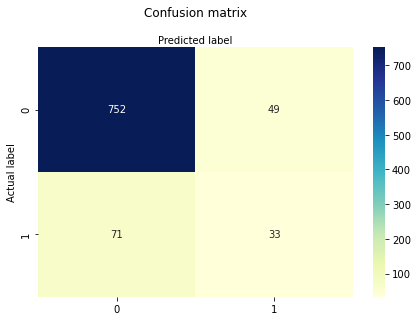

In [76]:
rf_opt_cnf_matrix = confusion_matrix(bank_test_y, pred_positive_2)
plot_confusion_matrix(rf_opt_cnf_matrix)

Indeed, if we decrease the threshold we might get more of those 71 that were predicted as non-subscribers but they were, classified as actual subscribers (true positive)

In [77]:
true_pos = rf_opt_cnf_matrix[1, 1]
true_neg = rf_opt_cnf_matrix[0,0]
false_pos = rf_opt_cnf_matrix[0, 1]
false_neg = rf_opt_cnf_matrix[1, 0]
TARGET_COST = 10
SUBSC_REV = 50
profit_formula = SUBSC_REV * true_pos - ((true_pos + false_pos)*TARGET_COST) 

print(f"""If we perform targeted telemarketing to all cusomter that are predicted to subscribe in the test set, the resulting 
profit would be {profit_formula} euros.""")

If we perform targeted telemarketing to all cusomter that are predicted to subscribe in the test set, the resulting 
profit would be 830 euros.


In [78]:
# Function to calculate expected profit (same function as before)
SUBSC_REV = 50
TARGET_COST = 10

predicted_prob_rf = forest_clas.predict_proba(bank_prepared_test)[:,1]
precisions, recalls, thresholds = precision_recall_curve(bank_test_y, prob_pred)
#fpr, tpr, thresholds = metrics.roc_curve(bank_test_y, predicted_prob_rf)

def expected_profit_func():
    all_profits = []
    for thresh in thresholds:
        y_test_pred_threshold = (predicted_prob_rf > thresh)
        opt_cnf_matrix = confusion_matrix(bank_test_y, y_test_pred_threshold)
        true_pos = opt_cnf_matrix[1, 1]
        true_neg = opt_cnf_matrix[0,0]
        false_pos = opt_cnf_matrix[0, 1]
        false_neg = opt_cnf_matrix[1, 0]

        profit = SUBSC_REV* true_pos - ((true_pos + false_pos)*TARGET_COST) 
        all_profits.append(profit)
    return all_profits

In [79]:
rf_thresh_index = np.argmax(expected_profit_func())
max_profit = max(expected_profit_func())
print(f"The maximum profit achievable would be of {max_profit}")

The maximum profit achievable would be of 1180


In [80]:
threshold_max =  thresholds[rf_thresh_index]
print(f"In random forest, the best threshold would be of {threshold_max}")

In random forest, the best threshold would be of 0.1339227365749319


***Analysis***
- With Random Forest, I expected to see a higher highest profit than with logistic regression. However, because we didn't do any hyperparameter tuning, this might also affect our model performance. 
- In fact, as tested below, if we change the max_depth to 10, we see a higher profit. Ideally, we should try to find the best parameter for this as well, since a very big number of depth might increase complexity of the model way more than desired. Generally, the deeper the tree, the more splits it has and it captures more information about the data.
- In the test set there are a total of 104 subscribers, yet this model only predicted 33. Definitely further tuning is needed since that is a big amount of potential profit loss if we are not able to correctly predict at least 50 % of this class.

In [106]:
rf_features = pd.DataFrame(forest_clas.feature_importances_)

In [109]:
rf_features_t = rf_features.T

rf_features_t.columns = q2_feature_labels

In [112]:
rf_features_t.T.sort_values(by = 0, ascending = False)

,0
Duration_Scaled,0.371719
Balance_Scaled,0.127423
Day_Scaled,0.117259
Campaign_Scaled,0.059661
housing_yes,0.024185
job_blue-collar,0.017854
education_tertiary,0.017448
education_secondary,0.015726
marital_divorced,0.015551
Age_Q1,0.014508


In [81]:
# Test to see depth effect on random forest

from sklearn.ensemble import RandomForestClassifier

forest_clas = RandomForestClassifier(n_estimators=10, random_state=42, max_depth=10)
forest_clas.fit(bank_train_q2, bank_train_y)

# Function to calculate expected profit (same function as before)
SUBSC_REV = 50
TARGET_COST = 10

predicted_prob_rf = forest_clas.predict_proba(bank_prepared_test)[:,1]
precisions, recalls, thresholds = precision_recall_curve(bank_test_y, prob_pred)
#fpr, tpr, thresholds = metrics.roc_curve(bank_test_y, predicted_prob_rf)

def expected_profit_func():
    all_profits = []
    for thresh in thresholds:
        y_test_pred_threshold = (predicted_prob_rf > thresh)
        opt_cnf_matrix = confusion_matrix(bank_test_y, y_test_pred_threshold)
        true_pos = opt_cnf_matrix[1, 1]
        true_neg = opt_cnf_matrix[0,0]
        false_pos = opt_cnf_matrix[0, 1]
        false_neg = opt_cnf_matrix[1, 0]

        profit = SUBSC_REV* true_pos - ((true_pos + false_pos)*TARGET_COST) 
        all_profits.append(profit)
    return all_profits

rf_thresh_index = np.argmax(expected_profit_func())
max_profit = max(expected_profit_func())
print(f"The maximum profit achievable would be of {max_profit}")

threshold_max =  thresholds[rf_thresh_index]
print(f"In random forest, the best threshold would be of {threshold_max}")

The maximum profit achievable would be of 1430
In random forest, the best threshold would be of 0.16654423334469204


Congratulations! Now you have been able to complete a end-to-end machine learning project. 